In [207]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from src.signature_detect.loader import Loader
from src.signature_detect.judger import Judger
from src.signature_detect.cropper import Cropper
from src.signature_detect.extractor import Extractor

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [209]:
def show_image(img):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(img, cmap="gray")
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

# Image

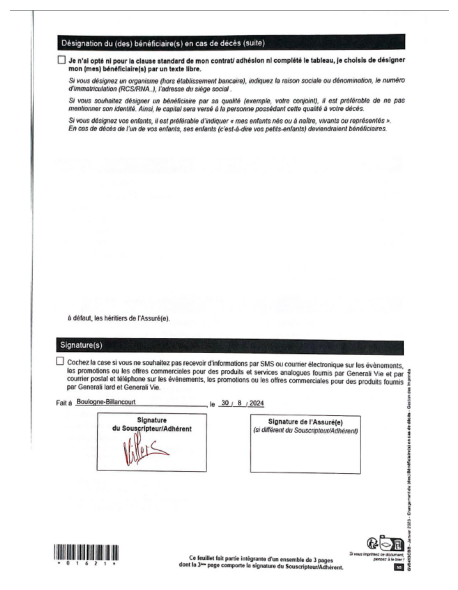

In [388]:
doc_path = r"data/input/7.png"

image = cv2.imread(doc_path)
show_image(image)

## Loader

The loader reads the file and creates a mask. 

The mask is a numpy array. The bright parts are set to 255, the rest is set to 0.

In [389]:
loader = Loader((0, 0, 0), (255, 255, 80))
print(loader)


Loader
low_threshold = (0, 0, 0)
high_threshold = (255, 255, 80)



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[  0 255]


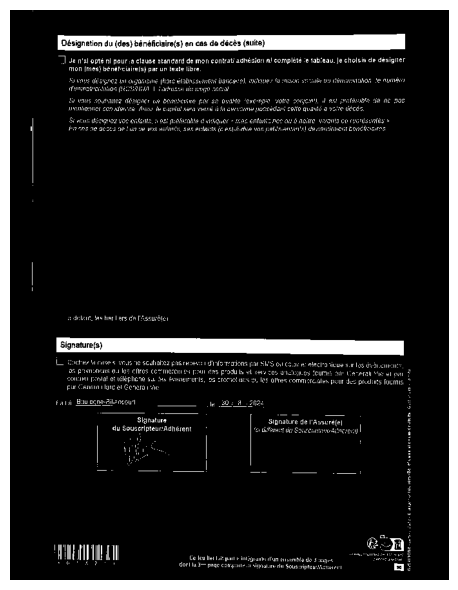

In [390]:
mask = loader.get_masks(doc_path)[0]
print(mask)
print(np.unique(mask))
show_image(mask)
# plt.imsave('./data/output/mask.jpeg', mask)

## Extractor

The extractor 

1. generates the regions from the mask.
2. removes the small and the big region because the signature is neither too big nor too small.

In [391]:
extractor = Extractor(outlier_weight=3, outlier_bias=20, amplfier=15, min_area_size=10)

print(extractor)


Extractor
outlier_weight = 3
outlier_bias = 20
> small_outlier_size = outlier_weight * average_region_size + outlier_bias
amplfier = 15
> large_outlier_size = amplfier * small_outlier_size
min_area_size = 10 (pixels)
> min_area_size is used to calculate average_region_size.



[Extractor] Total components before filtering: 2723
[Extractor] avg_area=92.8 too small → using fallback thresholds
[Extractor] avg_area=92.8, small_thr=100, big_thr=500000
[Extractor] Pixels kept after filtering: 23062
[  0 255]


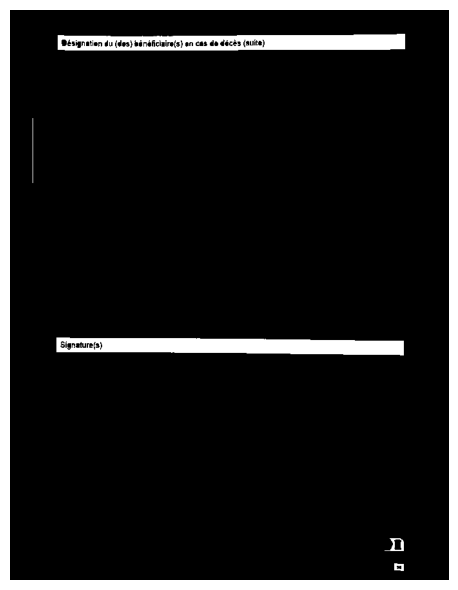

In [394]:
labeled_mask = extractor.extract(mask)
print(np.unique(labeled_mask))
show_image(labeled_mask)
# plt.imsave('./data/output/labeled_mask.jpeg', labeled_mask)

## Cropper

The cropper finds the **contours** of regions in the **labeled masks** and crop them.

In [362]:
cropper = Cropper(min_region_size=5000)
print(cropper)


Cropper
min_region_size = 5000
border_ratio = 0.02



In [363]:
results = cropper.run(labeled_mask)
results

{0: {'cropped_region': [1685, 807, 370, 360],
  'cropped_mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], shape=(360, 370), dtype=uint8)},
 1: {'cropped_region': [1503, 938, 131, 139],
  'cropped_mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], shape=(139, 131), dtype=uint8)},
 2: {'cropped_region': [1415, 962, 74, 134],
  'cropped_mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], shape=(134, 74), dtype=uint8)}}

## Judger

The judger reads the cropped mask and identifies if it's a signature or not.

In [364]:
judger = Judger()
print(judger)


Judger
size_ratio = [1, 10]
pixel_ratio = [0.1, 50]



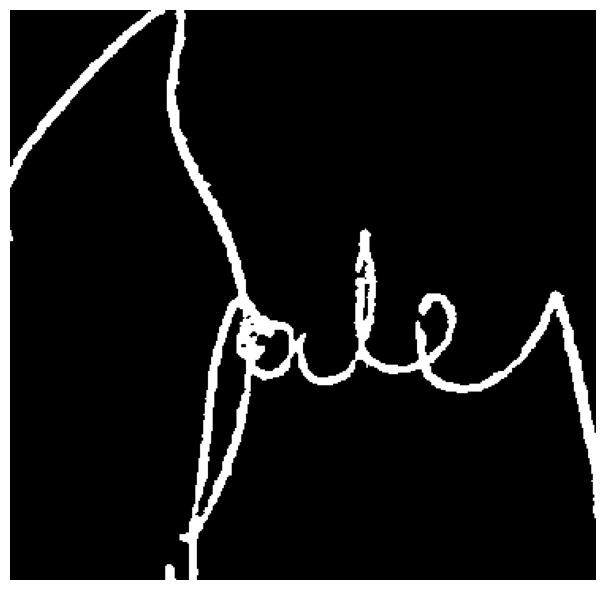

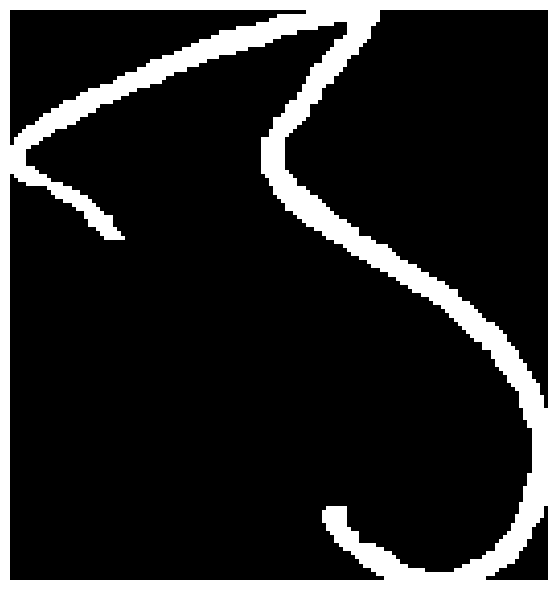

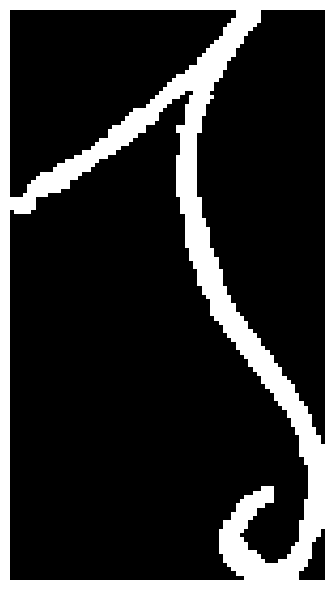

[{'id': 0, 'signed': True, 'box': [1685, 807, 370, 360]}, {'id': 1, 'signed': True, 'box': [1503, 938, 131, 139]}, {'id': 2, 'signed': True, 'box': [1415, 962, 74, 134]}]


In [365]:
regions = []

for idx, result in results.items():
    signature = result["cropped_mask"]
    show_image(signature)
    result = judger.judge(signature)
    regions.append({"id": idx, "signed": result, "box": results[idx]["cropped_region"]})

print(regions)

## Not signed doc test

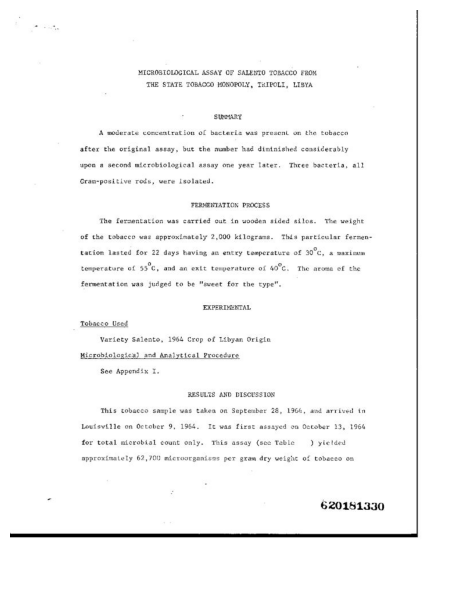

In [223]:
not_signed_doc_path = r"Datasets/unsigned/scientific_report/0001076990.jpg"

image = cv2.imread(not_signed_doc_path)
show_image(image)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[  0 255]


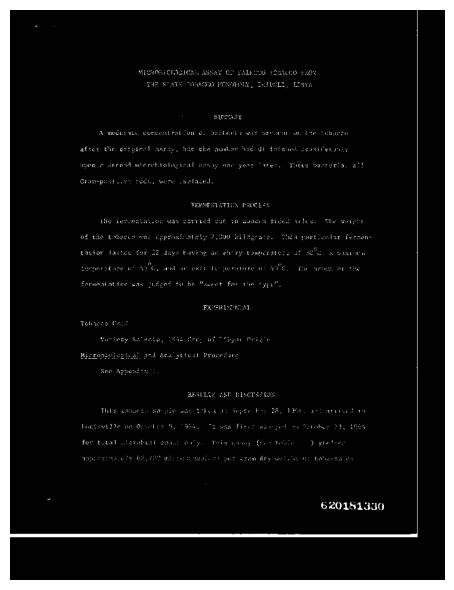

In [224]:
mask = loader.get_masks(not_signed_doc_path)[0]
print(mask)
print(np.unique(mask))
show_image(mask)

[  0 255]


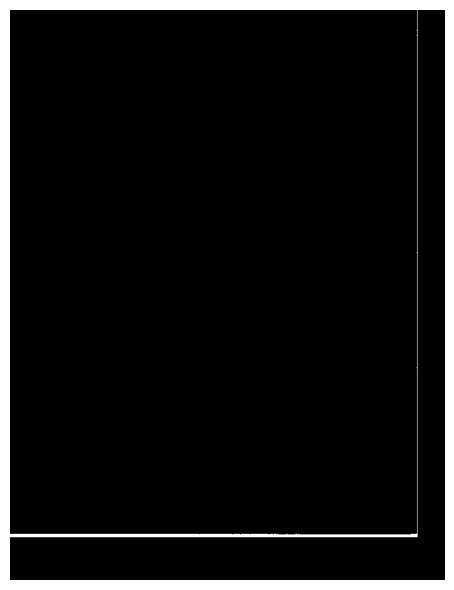

In [225]:
labeled_mask = extractor.extract(mask)
print(np.unique(labeled_mask))
show_image(labeled_mask)

In [226]:
results = cropper.run(labeled_mask)
results

{0: {'cropped_region': [14, 14, 686, 897],
  'cropped_mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], shape=(897, 686), dtype=uint8)}}

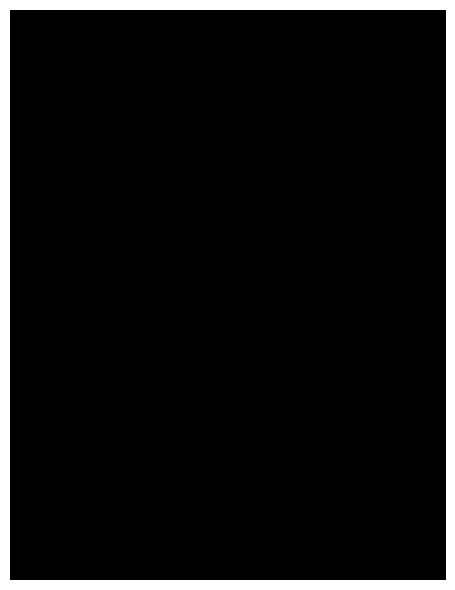

[{'id': 0, 'signed': False, 'box': [14, 14, 686, 897]}]


In [227]:
regions = []

for idx, result in results.items():
    signature = result["cropped_mask"]
    show_image(signature)
    result = judger.judge(signature)
    regions.append({"id": idx, "signed": result, "box": results[idx]["cropped_region"]})

print(regions)

# PDF

file_path = './data/input/signed_file.pdf'
loader = Loader()
extractor = Extractor(amplfier=15)
cropper = Cropper(border_ratio=0)
judger = Judger()

masks = loader.get_masks(file_path)
for i in range(len(masks)):
    show_image(masks[i])
    # plt.imsave('./data/output/mask_{}.jpeg'.format(i), masks[i])

is_signed = False
for i in range(len(masks)):
    labeled_mask = extractor.extract(masks[i])
    show_image(labeled_mask)
    # plt.imsave('./data/output/labeled_mask_{}.jpeg'.format(i), labeled_mask)
    results = cropper.run(labeled_mask)
    for result in results.values():
        is_signed = judger.judge(result["cropped_mask"])
        if is_signed:
            show_image(result["cropped_mask"])
            # plt.imsave('./data/output/sign.jpeg'.format(i), cropped_image)
            break
    if is_signed:
        break
print(is_signed)